# Trabalho 2

Gustavo Andrade Tavares N°USP: 11212362

## Ajuste dos dados

In [2]:
# Estruturar os dados em T1 = [], Y1 = [] e, T2 = [], Y2 = []

# Abertura de arquivos que estão no google drive
arq1 = open("/content/drive/MyDrive/Arquivos_Colab/Cálculo Numérico/Trabalho 2/gauss_data_51.txt","r")
arq2 = open("/content/drive/MyDrive/Arquivos_Colab/Cálculo Numérico/Trabalho 2/gauss_data_22.txt","r")

# Alternativa de abertura, com dados na mesma pasta do programa
#arq1 = open("gauss_data_51.txt","r")
#arq2 = open("gauss_data_22.txt","r")

D1 = []
D2 = []

for line in arq1:
  s1 = line.replace("\n","")
  if(s1.count("   ") == 2):
    s2 = s1.replace("   "," ")
    s3 = s2.split(" ")
    s3.remove("")
    s3[0] = float(s3[0])
    s3[1] = float(s3[1])
    D1.append(s3)
  else:
    s2 = s1.replace("   ","")
    s3 = s2.split("  ")
    s3[0] = float(s3[0])
    s3[1] = float(s3[1])
    D1.append(s3)

for line in arq2:
  s1 = line.replace("\n","")
  if(s1.count("   ") == 2):
    s2 = s1.replace("   "," ")
    s3 = s2.split(" ")
    s3.remove("")
    s3[0] = float(s3[0])
    s3[1] = float(s3[1])
    D2.append(s3)
  else:
    s2 = s1.replace("   ","")
    s3 = s2.split("  ")
    s3[0] = float(s3[0])
    s3[1] = float(s3[1])
    D2.append(s3)

T1 = []
Y1 = []

for i in D1:
  T1.append(i[0])
  Y1.append(i[1])

T2 = []
Y2 = []

for i in D2:
  T2.append(i[0])
  Y2.append(i[1])

In [3]:
print(T1)
print(Y1)
print(T2)
print(Y2)

[0.0, 0.0050025013, 0.010005003, 0.015007504, 0.020010005, 0.025012506, 0.030015008, 0.035017509, 0.04002001, 0.045022511, 0.050025013, 0.055027514, 0.060030015, 0.065032516, 0.070035018, 0.075037519, 0.08004002, 0.085042521, 0.090045023, 0.095047524, 0.10005003, 0.10505253, 0.11005503, 0.11505753, 0.12006003, 0.12506253, 0.13006503, 0.13506753, 0.14007004, 0.14507254, 0.15007504, 0.15507754, 0.16008004, 0.16508254, 0.17008504, 0.17508754, 0.18009005, 0.18509255, 0.19009505, 0.19509755, 0.20010005, 0.20510255, 0.21010505, 0.21510755, 0.22011006, 0.22511256, 0.23011506, 0.23511756, 0.24012006, 0.24512256, 0.25012506, 0.25512756, 0.26013007, 0.26513257, 0.27013507, 0.27513757, 0.28014007, 0.28514257, 0.29014507, 0.29514757, 0.30015008, 0.30515258, 0.31015508, 0.31515758, 0.32016008, 0.32516258, 0.33016508, 0.33516758, 0.34017009, 0.34517259, 0.35017509, 0.35517759, 0.36018009, 0.36518259, 0.37018509, 0.37518759, 0.3801901, 0.3851926, 0.3901951, 0.3951976, 0.4002001, 0.4052026, 0.4102051,

# Método de Gauss-Newton $\alpha_k = 1$

$$ J_r(x) \in \mathbb{R}^{n \times 2}$$

$$[J_r(x^{(k)})^TJ_r(x^{(k)})]\delta_x^{(k)} = -J_r(x^{(k)})^Tr(x^{(k)})$$

$$x^{(k+1)} = x^{(k)} + \alpha_k\delta_x^{(k)}$$

$$r_i(x) = f(t_i;a,\sigma) - y_i$$


$$r(x) = [r_1(x), ..., r_n(x)]^T$$

$$ x = [a, \sigma]^T$$

Gaussiana: $$f(t;a,σ) = \dfrac{1}{\sqrt{2\pi\sigma^2}}exp^{\dfrac{-(t-a)^2}{2\sigma^2}}$$



*   Chute inicial gauss_data_51.txt: $a = 5$ e $\sigma = 1$
*   Chute inicial gauss_data_22.txt: $a = 2$ e $\sigma = 2$

In [4]:
# cálculo da matriz Jacobiana n x 2 e vetor r(x) n x 1
import numpy as np
import math

def Gaussiana(t,a,sig):
  y = (1/(math.sqrt(2 * math.pi * sig**2))) * (np.exp((-1/(2 * sig**2)) * ((t-a)**2)))
  return(y)

def der_parc_ri_x_a(a,sig,t):
  y = (1/(math.sqrt(2 * math.pi * (sig**2)))) * (((t - a)**2)/ sig**2) * np.exp((-1/(2 * sig**2)) * ((t-a)**2))
  return(y)

def der_parc_ri_x_sig(a,sig,t):
  y = np.exp((-1/(2 * sig**2)) * ((t-a)**2)) * ((1/(math.sqrt(2 * math.pi))) * (((t-a)**2 - sig**2) / sig**4))
  return(y)

def Matriz_Jacobiana(n,X,T):
  J_r = np.zeros((n,2))
  for i in range(n):
    J_r[i][0] = der_parc_ri_x_a(X[0][0],X[1][0],T[i])
    J_r[i][1] = der_parc_ri_x_sig(X[0][0],X[1][0],T[i])
  return(J_r)

def r_x(n,X,T,Y):
  r_x = np.zeros((n,1))
  for i in range(n):
    r_x[i] = Gaussiana(T[i],X[0][0],X[1][0]) - Y[i]
  return(r_x)

In [7]:
# Método de Gauss-Newton para gauss-data-51.txt
import numpy as np
import math


def erro_relativo(X,D):
  n = math.sqrt((D[0][0] - X[0][0])**2 + (D[1][0] - X[1][0])**2)
  d = math.sqrt((D[0][0])**2 + (D[1][0])**2)
  e = n / d
  return(e)


#Critério de parada: número de iterações
# A partir da iteração 106 começa a aumentar erro relativo
def Gauss_Newton(X,T1,Y1,n):
  erro = 1
  kmax = 105
  k = 0
  while((k < kmax)):
    J_r = Matriz_Jacobiana(n,X,T1)
    J_rT = np.transpose(J_r)
    r = r_x(n,X,T1,Y1)
    H = J_rT @ J_r
    b = -J_rT @ r
    delta_x_k = np.linalg.solve(H,b)
    X_k = X + delta_x_k
    erro = erro_relativo(X,X_k)
    k += 1
    X = X_k
  return(X,k,erro)


"""
#Critério de parada: erro relativo inferior a 10^-3
# Para erros menores de 10^-3, retorna erro de matriz singular
def Gauss_Newton(X,T1,Y1,n):
  erro = 1
  k = 0
  while((erro > 10**(-3))):
    J_r = Matriz_Jacobiana(n,X,T1)
    J_rT = np.transpose(J_r)
    r = r_x(n,X,T1,Y1)
    H = J_rT @ J_r
    b = -J_rT @ r
    delta_x_k = np.linalg.solve(H,b)
    X_k = X + delta_x_k
    erro = erro_relativo(X,X_k)
    k += 1
    X = X_k
  return(X,k,erro)
"""

X = np.array([[5],[1]])
n = 2000

# Dados gauss-data-51.txt

s1, k1, e1 = Gauss_Newton(X,T1,Y1,n)
print(s1)
print(k1)
print(e1)

[[5.44716008]
 [0.5494734 ]]
105
0.0006175836161280705


In [9]:
# Método de Gauss-Newton para os dados gauss-data-22.txt
import numpy as np
import math


def erro_relativo(X,D):
  n = math.sqrt((D[0][0] - X[0][0])**2 + (D[1][0] - X[1][0])**2)
  d = math.sqrt((D[0][0])**2 + (D[1][0])**2)
  e = n / d
  return(e)

def Gauss_Newton(X,T1,Y1,n):
  erro = 1
  kmax = 1000
  k = 0
  while((erro > (10**(-8))) or (k > kmax)):
    J_r = Matriz_Jacobiana(n,X,T1)
    J_rT = np.transpose(J_r)
    r = r_x(n,X,T1,Y1)
    H = J_rT @ J_r
    b = -J_rT @ r
    delta_x_k = np.linalg.solve(H,b)
    X_k = X + delta_x_k
    erro = erro_relativo(X,X_k)
    k += 1
    X = X_k
  return(X,k,erro)

X = np.array([[2],[2]])
n = 3000


s2, k2, e2 = Gauss_Newton(X,T2,Y2,n)
print(s2)
print(k2)
print(e2)

[[4.1430751 ]
 [2.33516651]]
218
9.662921291484986e-09


# Gráficos: Comparação do conjunto de dados com a gaussiana obtida

Text(0.5, 1.0, 'Comparação do conjunto dos dados com a Gaussiana obtida')

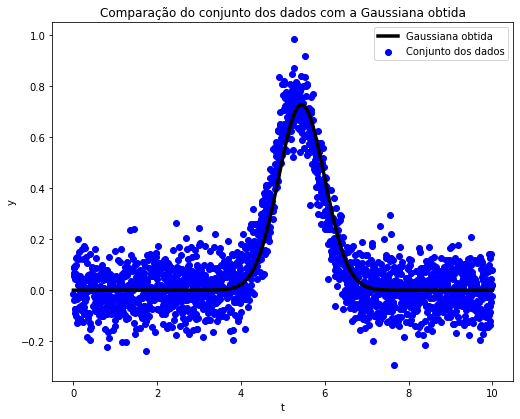

In [10]:
# Gráfico gauss_data_51.txt
import numpy as np
import matplotlib.pyplot as plt

S1 = np.array([[5.44716008], [0.5494734 ]])
t = T1
y = Gaussiana(t,S1[0][0],S1[1][0])

plt.figure(0, figsize = (8,6))
plt.subplots_adjust(right = 0.97, top = 0.98, left = 0.17, bottom = 0.15)
plt.scatter(T1,Y1, c = "b")
plt.plot(t,y,"k-", lw = 3.5)
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["Gaussiana obtida", "Conjunto dos dados"])
plt.title("Comparação do conjunto dos dados com a Gaussiana obtida")

Text(0.5, 1.0, 'Comparação do conjunto dos dados com a Gaussiana obtida')

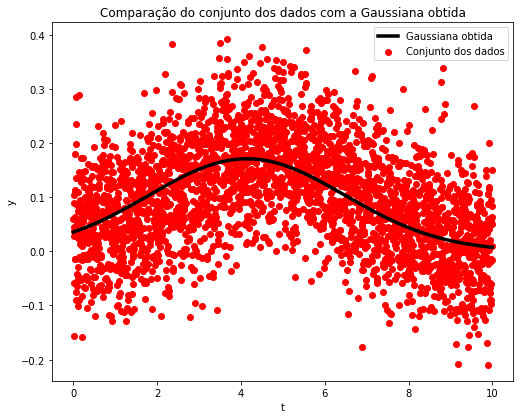

In [11]:
# Gráfico gauss_data_22.txt
import numpy as np
import matplotlib.pyplot as plt

S2 = np.array([[4.1430751], [2.33516651]])
t = T2
y = Gaussiana(t,S2[0][0],S2[1][0])

plt.figure(0, figsize = (8,6))
plt.subplots_adjust(right = 0.97, top = 0.98, left = 0.17, bottom = 0.15)
plt.scatter(T2,Y2, c = "r")
plt.plot(t,y,"k-", lw = 3.5)
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["Gaussiana obtida", "Conjunto dos dados"])
plt.title("Comparação do conjunto dos dados com a Gaussiana obtida")

# Mínimos Quadrados no problema linearizado

$$f(t;a,σ) = \dfrac{1}{\sqrt{2\pi\sigma^2}}exp\left \{{\dfrac{-(t-a)^2}{2\sigma^2}}\right\}$$

$$\sqrt{2\pi\sigma^2}f(t;a,σ) = exp\left \{{\dfrac{-(t-a)^2}{2\sigma^2}}\right\}$$


$$ln(2\pi\sigma^2f^2(t;a,σ)) = \dfrac{-2(t-a)^2}{2\sigma^2}$$

$$ln(2\pi\sigma^2) + ln(f^2(t;a,σ)) = \dfrac{-1^2}{\sigma^2}t^2 + \dfrac{2a}{\sigma^2}t - \dfrac{a^2}{\sigma^2}$$

$$ln(f^2(t;a,σ)) = \dfrac{-1}{\sigma^2}t^2 + \dfrac{2a}{\sigma^2}t - \dfrac{a^2}{\sigma^2} - ln(2\pi\sigma^2)$$

In [12]:
# minimos quadrados linear no problema linearizado gauss_data_51.txt
import numpy as np

# Encontrar a e sig por meio de a0, a1 e a2 obtidos no mmq

# x,y vetores linha, k: grau do polinômio
def mmq(x,y,k):
  n = len(x)
  X = np.vander(x)
  X = X[:,n-k-1:n]
  A = (np.transpose(X)) @ X
  B = (np.transpose(X)) @ (np.transpose(y))
  a = np.linalg.solve(A,B)
  return(np.transpose(a))

s = mmq(T1,Y1,2)
print(s)

[-0.01462564  0.14989446 -0.16162089]


In [14]:
import math

sig = math.sqrt((-1/s[0]))

a = ((sig**2) * (s[1])) / 2

c = ((-a**2)/(sig**2)) - np.log(2*math.pi*sig**2)


print(sig)
print(a)
print(c)

8.268800559396132
5.1243717187956275
-6.446913463736262


Text(0.5, 1.0, 'Comparação da Gaussiana obtida pelo MMQ Não Linear com a solução do MMQ lin.')

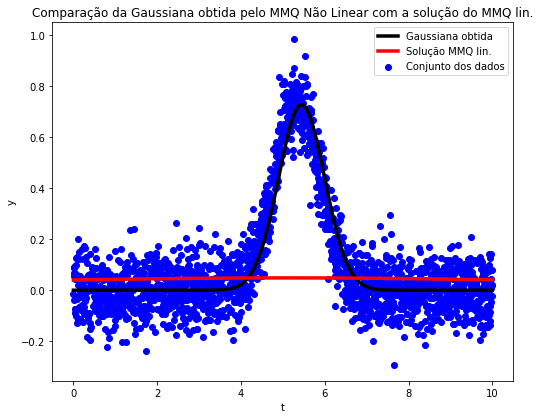

In [15]:
import numpy as np
import matplotlib.pyplot as plt

S1 = np.array([[5.44716008], [0.5494734 ]])

t = T1
y = Gaussiana(t,S1[0][0],S1[1][0])

def ft(t):
  y = math.sqrt(np.exp((-0.01462564*t**2 + 0.14989446*t - 6.446913463736262)))
  return(y)


y1 = []
for i in range(len(T1)):
  y1.append(ft(T1[i]))


plt.figure(0, figsize = (8,6))
plt.subplots_adjust(right = 0.97, top = 0.98, left = 0.17, bottom = 0.15)
plt.scatter(T1,Y1, c = "b")
plt.plot(t,y,"k-", lw = 3.5)
plt.plot(t,y1,"r-",lw = 3.5)
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["Gaussiana obtida","Solução MMQ lin.", "Conjunto dos dados"])
plt.title("Comparação da Gaussiana obtida pelo MMQ Não Linear com a solução do MMQ lin.")

In [13]:
# minimos quadrados linear no problema linearizado gauss_data_51.txt
import numpy as np

# Encontrar a e sig por meio de a0, a1 e a2 obtidos no mmq

# x,y vetores linha, k: grau do polinômio
def mmq(x,y,k):
  n = len(x)
  X = np.vander(x)
  X = X[:,n-k-1:n]
  A = (np.transpose(X)) @ X
  B = (np.transpose(X)) @ (np.transpose(y))
  a = np.linalg.solve(A,B)
  return(np.transpose(a))

s2 = mmq(T2,Y2,2)
print(s2)

[-0.0066945   0.06142559  0.01164497]


In [16]:
sig = math.sqrt((-1/s2[0]))

a = ((sig**2) * (s2[1])) / 2

c = ((-a**2)/(sig**2)) - np.log(2*math.pi*sig**2)

print(sig)
print(a)
print(c)

12.221965940944534
4.587768343184552
-6.985249894934206


Text(0.5, 1.0, 'Comparação da Gaussiana obtida pelo MMQ Não Linear com a solução do MMQ lin.')

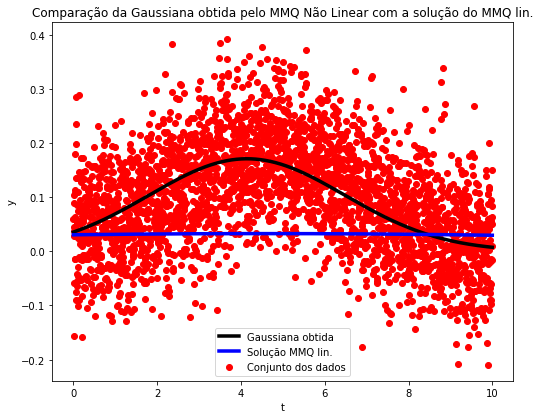

In [17]:
import numpy as np
import matplotlib.pyplot as plt

S2 = np.array([[4.1430751], [2.33516651]])
t = T2
y = Gaussiana(t,S2[0][0],S2[1][0])

def ft(t):
  y = math.sqrt(np.exp((-0.0066945*t**2 + 0.06142559*t - 6.98524989)))
  return(y)


y1 = []
for i in range(len(T2)):
  y1.append(ft(T2[i]))

plt.figure(0, figsize = (8,6))
plt.subplots_adjust(right = 0.97, top = 0.98, left = 0.17, bottom = 0.15)
plt.scatter(T2,Y2, c = "r")
plt.plot(t,y,"k-", lw = 3.5)
plt.plot(t,y1,"b-",lw = 3.5)
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["Gaussiana obtida","Solução MMQ lin.", "Conjunto dos dados"])
plt.title("Comparação da Gaussiana obtida pelo MMQ Não Linear com a solução do MMQ lin.")

# Sensibilidade

In [18]:
# Estudo da sensibilidade para gauss-data-51.txt
import numpy as np
import math


def erro_relativo(X,D):
  n = math.sqrt((D[0][0] - X[0][0])**2 + (D[1][0] - X[1][0])**2)
  d = math.sqrt((D[0][0])**2 + (D[1][0])**2)
  e = n / d
  return(e)

def Gauss_Newton(X,T1,Y1,n):
  erro = 1
  kmax = 1000
  k = 0
  while((erro > (10**(-3))) or (k > kmax)):
    J_r = Matriz_Jacobiana(n,X,T1)
    J_rT = np.transpose(J_r)
    r = r_x(n,X,T1,Y1)
    H = J_rT @ J_r
    b = -J_rT @ r
    delta_x_k = np.linalg.solve(H,b)
    X_k = X + delta_x_k
    erro = erro_relativo(X,X_k)
    k += 1
    X = X_k
  return(X,k,erro)

#Variação de Chutes iniciais

X = np.array([[5.4],[0.5]])
#X = np.array([[5.6],[0.8]])
#X = np.array([[5.8],[1.2]])
#X = np.array([[5.9],[1.5]])
#X = np.array([[5.95],[1.7]])
n = 2000

# Dados gauss-data-51.txt

s1, k1, e1 = Gauss_Newton(X,T1,Y1,n)
print(s1)
print(k1)
print(e1)

[[5.40435885]
 [0.54244801]]
2
0.00072287735477248


In [19]:
# Estudo da sensibilidade para gauss-data-22.txt

import numpy as np
import math


def erro_relativo(X,D):
  n = math.sqrt((D[0][0] - X[0][0])**2 + (D[1][0] - X[1][0])**2)
  d = math.sqrt((D[0][0])**2 + (D[1][0])**2)
  e = n / d
  return(e)

def Gauss_Newton(X,T1,Y1,n):
  erro = 1
  kmax = 1000
  k = 0
  while((erro > (10**(-5))) or (k > kmax)):
    J_r = Matriz_Jacobiana(n,X,T1)
    J_rT = np.transpose(J_r)
    r = r_x(n,X,T1,Y1)
    H = J_rT @ J_r
    b = -J_rT @ r
    delta_x_k = np.linalg.solve(H,b)
    X_k = X + delta_x_k
    erro = erro_relativo(X,X_k)
    k += 1
    X = X_k
  return(X,k,erro)

#X = np.array([[2.3],[1.5]])
#X = np.array([[2.4],[1.3]])
#X = np.array([[3.5],[2.2]])
#X = np.array([[4],[2.5]])
X = np.array([[4.7],[2.7]])


n = 3000

# Dados gauss-data-22.txt

s2, k2, e2 = Gauss_Newton(X,T2,Y2,n)
print(s2)
print(k2)
print(e2)

[[4.14379622]
 [2.3349737 ]]
121
9.845315056878103e-06


# Interpolação Quadrática para encontrar $\alpha_k$

$$\phi(x) = \dfrac{1}{2} \|r(x)\|^2$$

$$P_2(x) = \phi[p_1] + (x - p_1)\phi[p_1,p_2] + (x - p_1)(x - p_2)\phi[p_1,p_2,p_3]$$

Text(0.5, 1.0, 'Gráfico phi(x)')

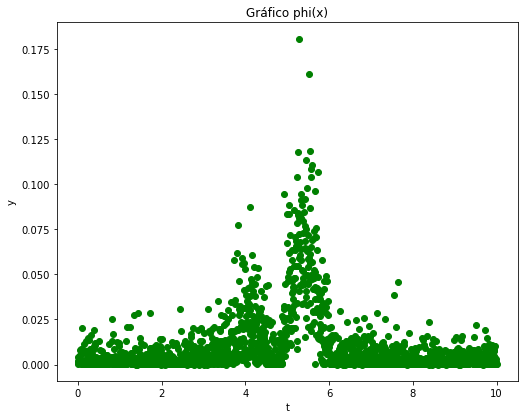

In [20]:
# phi(x) para gauss-data-51.txt

import matplotlib.pyplot as plt

X = np.array([[5],[1]])
n = 2000
v = r_x(n,X,T1,Y1)
phi = []

for i in range(n):
  fi = ((v[i][0])**2) / 2
  phi.append(fi)


t = T1
y = phi

plt.figure(0, figsize = (8,6))
plt.subplots_adjust(right = 0.97, top = 0.98, left = 0.17, bottom = 0.15)
plt.scatter(t,y, c = "g")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Gráfico phi(x)")

In [21]:
# Escolha de três pontos para gauss-data-51.txt
a = T1[0]
c = T1[1999]
b = T1[1000]
x = T1[1001]
X = np.array([[5],[1]])

def phi(t,X,y):
  fi = Gaussiana(t,X[0][0],X[1][0]) - y
  r = (fi**2)/2
  return(r)

def maximo_parabola(a,b,c,x,T1,Y1,X):
  r = []
  j = T1.index(x)
  if((x > b) and (phi(x,X,Y1[j]) > phi(b,X,Y1[j]))):
    r.append(b)
    r.append(x)
    r.append(c)
  elif((x > b) and (phi(x,X,Y1[j]) < phi(b,X,Y1[j]))):
    r.append(a)
    r.append(b)
    r.append(x)
  else:
    return()
  return(r)

t1 = maximo_parabola(a,b,c,x,T1,Y1,X)
j = T1.index(t1[1])
x = T1[j+1]
t2 = maximo_parabola(t1[0],t1[1],t1[2],x,T1,Y1,X)
print(t1)
print(t2)


def dif_div(L1,T1,Y1,X):
  i = T1.index(L1[0])
  j = T1.index(L1[1])
  k = T1.index(L1[2])
  L2 = [phi(T1[i],X,Y1[i]), phi(T1[j],X,Y1[j]), phi(T1[k],X,Y1[k])]
  L3 = [((L2[1] - L2[0]) / (L1[1] - L1[0])), ((L2[2] - L2[1]) / (L1[2] - L1[1]))]
  L4 = [((L3[1] - L3[0]) / (L1[2] - L1[0]))]
  return(L2[0], L3[0], L4[0])

phi0, phi01, phi012 = dif_div(t2,T1,Y1,X)
print(phi0, phi01, phi012)

[5.0025013, 5.0075038, 10.0]
[5.0075038, 5.0125063, 10.0]
0.025819745304825496 -1.106880710776471 0.22090418971881864


In [22]:
# Método de Newton com alpha_k = 0.2209042 para gauss-data-51.txt
import numpy as np
import math


def erro_relativo(X,D):
  n = math.sqrt((D[0][0] - X[0][0])**2 + (D[1][0] - X[1][0])**2)
  d = math.sqrt((D[0][0])**2 + (D[1][0])**2)
  e = n / d
  return(e)

def Gauss_Newton(X,T1,Y1,n,alpha):
  erro = 1
  kmax = 100
  k = 0
  while((erro > (10**(-3))) or (k > kmax)):
    J_r = Matriz_Jacobiana(n,X,T1)
    J_rT = np.transpose(J_r)
    r = r_x(n,X,T1,Y1)
    H = J_rT @ J_r
    b = -J_rT @ r
    delta_x_k = np.linalg.solve(H,b)
    X_k = X + (alpha * delta_x_k)
    erro = erro_relativo(X,X_k)
    k += 1
    X = X_k
  return(X,k,erro)

X = np.array([[5],[1]])
#X = np.array([[5.4],[0.5]])
#X = np.array([[5.6],[0.8]])
#X = np.array([[5.8],[1.2]])
#X = np.array([[5.9],[1.5]])
#X = np.array([[5.95],[1.7]])
n = 2000


alpha = 0.2209042

s1, k1, e1 = Gauss_Newton(X,T1,Y1,n,alpha)
print(s1)
print(k1)
print(e1)

[[5.01362725]
 [0.65160213]]
14
0.0009332462626679713


Text(0.5, 1.0, 'Gráfico phi(x)')

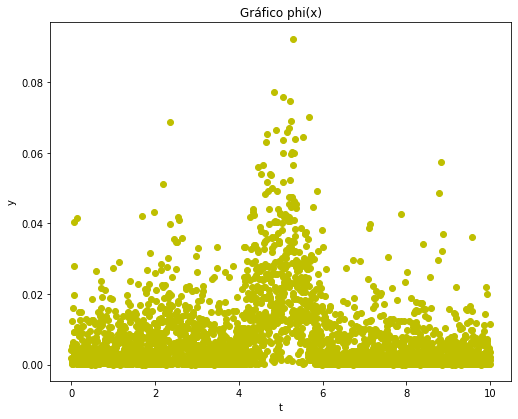

In [23]:
# phi(x) para gauss-data-51.txt
import matplotlib.pyplot as plt

X = np.array([[5],[1]])
n = 3000
v = r_x(n,X,T2,Y2)
phi = []

for i in range(n):
  fi = ((v[i][0])**2) / 2
  phi.append(fi)


t = T2
y = phi

plt.figure(0, figsize = (8,6))
plt.subplots_adjust(right = 0.97, top = 0.98, left = 0.17, bottom = 0.15)
plt.scatter(t,y, c = "y")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Gráfico phi(x)")

In [24]:
# Interpolação Quadrática para gauss-data-22.txt
a = T2[0]
c = T2[2999]
b = T2[1500]
x = T2[1501]
X = np.array([[2],[2]])

def phi(t,X,y):
  fi = Gaussiana(t,X[0][0],X[1][0]) - y
  r = (fi**2)/2
  return(r)

def maximo_parabola(a,b,c,x,T1,Y1,X):
  r = []
  j = T1.index(x)
  if((x > b) and (phi(x,X,Y1[j]) > phi(b,X,Y1[j]))):
    r.append(b)
    r.append(x)
    r.append(c)
  elif((x > b) and (phi(x,X,Y1[j]) < phi(b,X,Y1[j]))):
    r.append(a)
    r.append(b)
    r.append(x)
  else:
    return()
  return(r)

t1 = maximo_parabola(a,b,c,x,T2,Y2,X)
j = T2.index(t1[1])
x = T2[j+1]
t2 = maximo_parabola(t1[0],t1[1],t1[2],x,T2,Y2,X)
print(t1)
print(t2)


def dif_div(L1,T1,Y1,X):
  i = T1.index(L1[0])
  j = T1.index(L1[1])
  k = T1.index(L1[2])
  L2 = [phi(T1[i],X,Y1[i]), phi(T1[j],X,Y1[j]), phi(T1[k],X,Y1[k])]
  L3 = [((L2[1] - L2[0]) / (L1[1] - L1[0])), ((L2[2] - L2[1]) / (L1[2] - L1[1]))]
  L4 = [((L3[1] - L3[0]) / (L1[2] - L1[0]))]
  return(L2[0], L3[0], L4[0])

phi0, phi01, phi012 = dif_div(t2,T2,Y2,X)
print(phi0, phi01, phi012)

[5.0016672, 5.0050017, 10.0]
[5.0050017, 5.0083361, 10.0]
0.01376487865104504 8.099920025819873 -1.6227861817039977


In [25]:
# Método de Newton com alpha_k = 1.6227862 para gauss-data-22.txt
import numpy as np
import math


def erro_relativo(X,D):
  n = math.sqrt((D[0][0] - X[0][0])**2 + (D[1][0] - X[1][0])**2)
  d = math.sqrt((D[0][0])**2 + (D[1][0])**2)
  e = n / d
  return(e)

def Gauss_Newton(X,T1,Y1,n,alpha):
  erro = 1
  kmax = 1000
  k = 0
  while((erro > (10**(-5))) or (k > kmax)):
    J_r = Matriz_Jacobiana(n,X,T1)
    J_rT = np.transpose(J_r)
    r = r_x(n,X,T1,Y1)
    H = J_rT @ J_r
    b = -J_rT @ r
    delta_x_k = np.linalg.solve(H,b)
    X_k = X + (alpha * delta_x_k)
    erro = erro_relativo(X,X_k)
    k += 1
    X = X_k
  return(X,k,erro)

#X = np.array([[2],[2]])
#X = np.array([[2.3],[1.5]])
#X = np.array([[2.4],[1.3]])
#X = np.array([[3.5],[2.2]])
#X = np.array([[4],[2.5]])
X = np.array([[4.7],[2.7]])

n = 3000
alpha = 1.6227862


s2, k2, e2 = Gauss_Newton(X,T2,Y2,n,alpha)
print(s2)
print(k2)
print(e2)

[[4.14347341]
 [2.33505996]]
78
9.181774067861913e-06
